#### Import all the necessary libraries

In [1]:
# Math
import numpy as np

# DataSet Operations
import pandas as pd

# Missing Values Imputer
import sklearn
from sklearn.impute import SimpleImputer

# Encoding
from sklearn.preprocessing import LabelEncoder

# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Split into train and test data
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Evaluation
import statsmodels.api as sm

# Machine Leaning Model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import precision_recall_curve

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

#### Read the DataSet

In [2]:
# Read CSV
data = pd.read_csv('Leads.csv')

#### View the DataSet

In [3]:
# Read the data
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Understand the metadata and its structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Find all the colums with 'Select' field, ie, fields which are not filled

In [6]:
# Generate a dataframe of the percentage of select values in each column containing select
select_data = []
for column in data.columns.tolist():
    count = len(data[data[column] == 'Select'])
    if count > 0:
        select_data.append((column, (count / len(data)) * 100 ))

select_df = pd.DataFrame(select_data, columns =['Column', 'Select Values']) 
select_df

,Column,Select Values
0,Specialization,21.017316
1,How did you hear about X Education,54.577922
2,Lead Profile,44.870130
3,City,24.339827


#### Find all the columns with missing / null values

In [7]:
# Generate a dataframe of all columns with missing values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


#### Find the percentage of missing values in the columns having select field

In [8]:
missing_values_in_select_columns = missing_value_df[missing_value_df['Column'].isin(select_df['Column'].tolist())]
missing_values_in_select_columns

,Column,Missing Values
12,Specialization,15.562771
13,How did you hear about X Education,23.885281
28,Lead Profile,29.318182
29,City,15.367965


#### Combine both results to form an aggregated result for the columns having both missing and null values

In [9]:
aggregated_df = pd.merge(missing_values_in_select_columns, select_df, on='Column', how='inner')
aggregated_df

,Column,Missing Values,Select Values
0,Specialization,15.562771,21.017316
1,How did you hear about X Education,23.885281,54.577922
2,Lead Profile,29.318182,44.870130
3,City,15.367965,24.339827


In [10]:
# This table shows the total / overall missing data from the columns in question
aggregated_df['Total'] = aggregated_df['Missing Values'] + aggregated_df['Select Values']
aggregated_df

,Column,Missing Values,Select Values,Total
0,Specialization,15.562771,21.017316,36.580087
1,How did you hear about X Education,23.885281,54.577922,78.463203
2,Lead Profile,29.318182,44.870130,74.188312
3,City,15.367965,24.339827,39.707792


##### Observation: The columns 'How did you hear about X Education' and 'Lead Profile'  have almost 3/4th of their data missing and imputing those data will not be recommended. Hence we simply drop the two columns.

In [11]:
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Observation: The column city has almost 40% missing data. Moreover the column doesn't provide any useful information. The city column when combined with the country column could have yielded some geographical data, however looking at the city column values, it is unclear as to 'Tier II Cities', 'Other Cities' etc refer to a city in India or any other country. Hence, imputing the same would not yield any useful result

In [12]:
data.drop(['How did you hear about X Education', 'Lead Profile', 'City'], axis=1, inplace=True)

#### Impute the 'Specialization column setting 'Select' values to 'Unknown'

In [13]:
data['Specialization'] = data['Specialization'].str.replace('Select', 'Unknown')

In [14]:
# Observe the data distribution
data['Specialization'].value_counts()

Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### Observation: Specialization has nearly 36.5 missing values out of which 15.5 are 'Select'. After imputing we find the above results. The result is heavily dominant in favor of the unknowns. Moreover imputing it using 'most_frequent' would again increase the number of unknows and other imputation techniques might heavily skew the data as almost 1/5th of the data is missing. Hence, we drop this column as well.

In [15]:
data.drop(['Specialization'], axis=1, inplace=True)

#### Remove all the columns with more than 40% missing data

In [16]:
data = data[data.columns[data.isnull().mean() < 0.4]]

#### Get the percentage of missing values again

In [17]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


#### Get the skewness of each data. Here we check the skewness manually instead of using inbuild skew functions for better analysis.

In [18]:
# Plot the value counts of each function.
for column in data.columns.tolist():
    display(pd.DataFrame(data[column].value_counts()))

,Prospect ID
bec7f3ab-1bfc-4be6-8ff8-2bd43ef73b1e,1
959e0feb-86d3-458c-92ef-80ed01696ae7,1
2c3b373b-68c3-4872-a8e7-5fa96eb0fdca,1
a05293a3-52b0-4675-81f0-74abb5faa0d1,1
83776e64-c8be-4c21-a848-917e53667ce9,1
ccf2a916-309e-4d3a-809f-a3ec744ddf32,1
712055c7-9c5a-420c-b2ac-c9e53e3b7b59,1
9677e861-9fc6-435a-955d-37a0fa7340e4,1
bb83f4ad-646f-49e8-bd8a-75a7cce69e49,1
8dcac5c4-c060-4f1f-8922-4e68aaec25ff,1


,Lead Number
608255,1
596233,1
656682,1
592824,1
652580,1
583105,1
623906,1
646433,1
599326,1
605469,1


,Lead Origin
Landing Page Submission,4886
API,3580
Lead Add Form,718
Lead Import,55
Quick Add Form,1


,Lead Source
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6
google,5


,Do Not Email
No,8506
Yes,734


,Do Not Call
No,9238
Yes,2


,Converted
0,5679
1,3561


,TotalVisits
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


,Total Time Spent on Website
0,2193
60,19
127,18
75,18
74,18
157,17
234,17
32,17
87,17
62,17


,Page Views Per Visit
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
7.00,133


,Last Activity
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93
Unsubscribed,61


,Country
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Bahrain,7
Hong Kong,7


,What is your current occupation
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


,What matters most to you in choosing a course
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


,Search
No,9226
Yes,14


,Magazine
No,9240


,Newspaper Article
No,9238
Yes,2


,X Education Forums
No,9239
Yes,1


,Newspaper
No,9239
Yes,1


,Digital Advertisement
No,9236
Yes,4


,Through Recommendations
No,9233
Yes,7


,Receive More Updates About Our Courses
No,9240


,Tags
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175
Not doing further education,145
Interested in full time MBA,117


,Update me on Supply Chain Content
No,9240


,Get updates on DM Content
No,9240


,I agree to pay the amount through cheque
No,9240


,A free copy of Mastering The Interview
No,6352
Yes,2888


,Last Notable Activity
Modified,3407
Email Opened,2827
SMS Sent,2172
Page Visited on Website,318
Olark Chat Conversation,183
Email Link Clicked,173
Email Bounced,60
Unsubscribed,47
Unreachable,32
Had a Phone Conversation,14


#### Drop all the columns which are heavily biased towards a single or a set of values.

In [19]:
data.drop(['Do Not Call', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 
           'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 
          'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search',
          'What matters most to you in choosing a course'], axis=1, inplace=True)

In [20]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Will revert after reading the email,No,Modified


In [21]:
for column in data.columns.tolist():
    display(pd.DataFrame(data[column].value_counts()))

,Prospect ID
bec7f3ab-1bfc-4be6-8ff8-2bd43ef73b1e,1
959e0feb-86d3-458c-92ef-80ed01696ae7,1
2c3b373b-68c3-4872-a8e7-5fa96eb0fdca,1
a05293a3-52b0-4675-81f0-74abb5faa0d1,1
83776e64-c8be-4c21-a848-917e53667ce9,1
ccf2a916-309e-4d3a-809f-a3ec744ddf32,1
712055c7-9c5a-420c-b2ac-c9e53e3b7b59,1
9677e861-9fc6-435a-955d-37a0fa7340e4,1
bb83f4ad-646f-49e8-bd8a-75a7cce69e49,1
8dcac5c4-c060-4f1f-8922-4e68aaec25ff,1


,Lead Number
608255,1
596233,1
656682,1
592824,1
652580,1
583105,1
623906,1
646433,1
599326,1
605469,1


,Lead Origin
Landing Page Submission,4886
API,3580
Lead Add Form,718
Lead Import,55
Quick Add Form,1


,Lead Source
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6
google,5


,Do Not Email
No,8506
Yes,734


,Converted
0,5679
1,3561


,TotalVisits
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


,Total Time Spent on Website
0,2193
60,19
127,18
75,18
74,18
157,17
234,17
32,17
87,17
62,17


,Page Views Per Visit
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
7.00,133


,Last Activity
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93
Unsubscribed,61


,Country
India,6492
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10
Bahrain,7
Hong Kong,7


,What is your current occupation
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


,Tags
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175
Not doing further education,145
Interested in full time MBA,117


,A free copy of Mastering The Interview
No,6352
Yes,2888


,Last Notable Activity
Modified,3407
Email Opened,2827
SMS Sent,2172
Page Visited on Website,318
Olark Chat Conversation,183
Email Link Clicked,173
Email Bounced,60
Unsubscribed,47
Unreachable,32
Had a Phone Conversation,14


#### Find the percentage of missing values

In [22]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Converted,0.000000
6,TotalVisits,1.482684
7,Total Time Spent on Website,0.000000
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719


#### Drop the tags column as the percentage of missing values is very high

In [23]:
data.drop(['Tags'], axis=1, inplace=True)

In [24]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Converted,0.000000
6,TotalVisits,1.482684
7,Total Time Spent on Website,0.000000
8,Page Views Per Visit,1.482684
9,Last Activity,1.114719


#### Function to impute the missing values

In [25]:
def impute_values(data, column):
    imputer.fit(data[[column]])
    data[[column]] = imputer.transform(data[[column]])
    return data

#### Impute all the numeric data using a median strategy.

In [26]:
imputer = SimpleImputer(strategy='median')

In [27]:
data = impute_values(data, 'TotalVisits')
data = impute_values(data, 'Total Time Spent on Website')
data = impute_values(data, 'Page Views Per Visit')

#### Outlier Treatment.

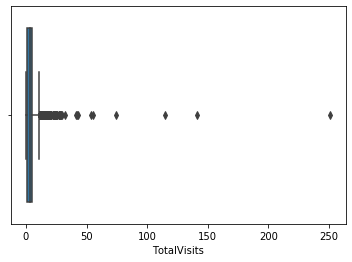

In [28]:
sns.boxplot(data['TotalVisits'])

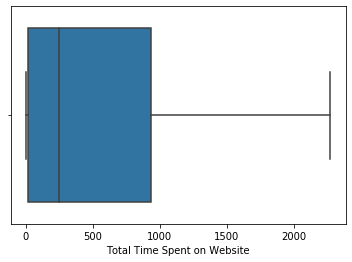

In [29]:
sns.boxplot(data['Total Time Spent on Website'])

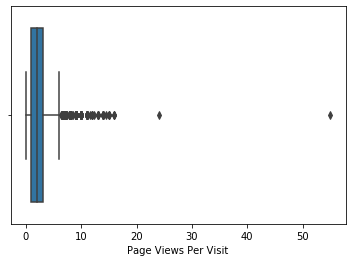

In [30]:
sns.boxplot(data['Page Views Per Visit'])

#### Define methods for treating the outliers. Here we using 'removal' for very distant outliers and 'capping' for teh relatively closer ones. 

In [31]:
# Remove outliers using quantiles
def quantile_method(df, column, low = 0.05, high = 0.95):
    q1 = df[column].quantile(low)
    q2 = df[column].quantile(high)
    df = df[(df[column] >= q1) & (df[column] <= q2)]
    return df

# Cap the outliers
def capping_method(df, column, low = 0.10, high = 0.90):
    percentiles = df[column].quantile([low, high]).values
    df[column] = np.clip(df[column], percentiles[0], percentiles[1])
    return df

In [32]:
fit_for_removal = ['TotalVisits', 'Page Views Per Visit']
for column in fit_for_removal:
    data = quantile_method(data, column, 0.01, 0.99)
fit_for_capping = ['TotalVisits', 'Page Views Per Visit']
for column in fit_for_capping:
    data = capping_method(data, column)

#### Check the removal of outliers.

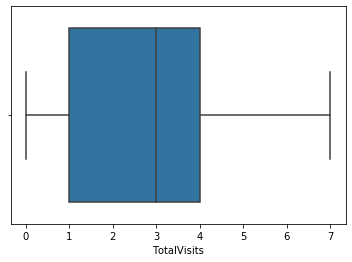

In [33]:
sns.boxplot(data['TotalVisits'])

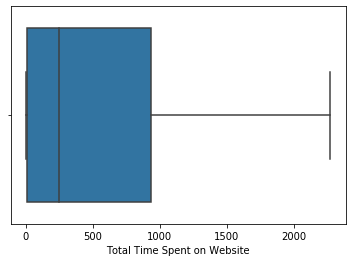

In [34]:
sns.boxplot(data['Total Time Spent on Website'])

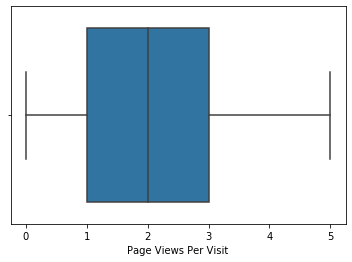

In [35]:
sns.boxplot(data['Page Views Per Visit'])

In [36]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.396040
4,Do Not Email,0.000000
5,Converted,0.000000
6,TotalVisits,0.000000
7,Total Time Spent on Website,0.000000
8,Page Views Per Visit,0.000000
9,Last Activity,1.133113


### NOTE: The columns 'country' and 'What is your current occupation have around 27% and 29% of missing values respectively, which in the context of the data and compared to other columns is extremely high. 

### These columns are important from business use case. 
#### Country - Would help in determining the geographical distribution of possible leads.
#### Current Occupation - Would help in determining which segment to target (Software engineers are more likely to opt for Data Science programs).

### Ideal Strategy: Try to collect the (correct) missing data from various sources.
### In this model we simply drop these two columns as imputing them will increase the skewness of the model.

In [37]:
data.drop(['Country', 'What is your current occupation'], axis=1, inplace=True)

In [38]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.396040
4,Do Not Email,0.000000
5,Converted,0.000000
6,TotalVisits,0.000000
7,Total Time Spent on Website,0.000000
8,Page Views Per Visit,0.000000
9,Last Activity,1.133113


#### Impute the categorical columns, using the most frequent values.

In [39]:
imputer = SimpleImputer(strategy='most_frequent')

In [40]:
data = impute_values(data, 'Lead Source')
data = impute_values(data, 'Last Activity')

In [41]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column': data.columns,
                                 'Missing Values': percent_missing})
missing_value_df.index = range(len(missing_value_df))
missing_value_df

,Column,Missing Values
0,Prospect ID,0.0
1,Lead Number,0.0
2,Lead Origin,0.0
3,Lead Source,0.0
4,Do Not Email,0.0
5,Converted,0.0
6,TotalVisits,0.0
7,Total Time Spent on Website,0.0
8,Page Views Per Visit,0.0
9,Last Activity,0.0


#### Club the values which are low into a single bracket of 'Others'. This will help in avoiding any skewness in the data. Each column has a different cutoff for categorizing into 'Others'

In [42]:
# Function to generate 'Others' column
def truncate(data, column, cutoff):
    count = data[column].value_counts()
    b = count[count < cutoff].index.tolist()
    data[column] = data[column].apply(lambda x: 'Others' if x in b else x)
    return data

In [43]:
truncate_columns = [('Lead Origin', 100),
                    ('Lead Source', 150),
                    ('Last Activity', 200),
                    ('Last Notable Activity', 500)
                   ]

for columns in truncate_columns:
    data = truncate(data, columns[0], columns[1])

In [44]:
for column in data.columns.tolist():
    display(pd.DataFrame(data[column].value_counts()))

,Prospect ID
bec7f3ab-1bfc-4be6-8ff8-2bd43ef73b1e,1
6d398ad4-8a00-46e1-b244-f58eed706525,1
dc22cf0e-8670-4841-9e5d-4d7d9d4a3a09,1
92b27be3-3150-4604-b38a-ab0077a9bbe2,1
2c3b373b-68c3-4872-a8e7-5fa96eb0fdca,1
a05293a3-52b0-4675-81f0-74abb5faa0d1,1
83776e64-c8be-4c21-a848-917e53667ce9,1
ccf2a916-309e-4d3a-809f-a3ec744ddf32,1
9677e861-9fc6-435a-955d-37a0fa7340e4,1
844d7d83-56a7-4386-a44b-e8cf302dee11,1


,Lead Number
608255,1
599326,1
656682,1
592824,1
652580,1
583105,1
623906,1
646433,1
605469,1
648494,1


,Lead Origin
Landing Page Submission,4769
API,3548
Lead Add Form,717
Others,56


,Lead Source
Google,2872
Direct Traffic,2499
Olark Chat,1753
Organic Search,1092
Reference,533
Others,341


,Do Not Email
No,8383
Yes,707


,Converted
0,5595
1,3495


,TotalVisits
0.0,2189
2.0,1680
3.0,1443
4.0,1120
7.0,1014
5.0,783
6.0,466
1.0,395


,Total Time Spent on Website
0.0,2193
60.0,19
75.0,18
127.0,18
32.0,17
87.0,17
234.0,17
62.0,17
74.0,17
69.0,16


,Page Views Per Visit
0.00,2189
2.00,1929
3.00,1193
5.00,1060
4.00,893
1.00,651
1.50,305
2.50,239
3.50,90
1.33,66


,Last Activity
Email Opened,3493
SMS Sent,2707
Olark Chat Conversation,967
Page Visited on Website,594
Converted to Lead,428
Email Bounced,324
Others,313
Email Link Clicked,264


,A free copy of Mastering The Interview
No,6292
Yes,2798


,Last Notable Activity
Modified,3361
Email Opened,2789
SMS Sent,2143
Others,797


#### Separate the identifier columns from the main dataset.

In [45]:
ID = data[['Prospect ID', 'Lead Number']]
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [46]:
ID

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624
9,af465dfc-7204-4130-9e05-33231863c4b5,660616


#### Convert the categorical columns into dummies to feed it into the model.

In [47]:
evaluation_data = data.copy()
data = pd.get_dummies(data, drop_first=True)

In [48]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0.0,0.0,0.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,2.0,1428.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Separate the data into a dependent and independent variables.

In [49]:
# Independent variable(s)
X = data.drop('Converted', axis=1)

In [50]:
# Dependent Variable
y = data['Converted']

#### Divide the data into train and test data.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

#### Scale the data.

In [52]:
# We use a standard scaler, alternatively min-max can be used too.
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
2401,0.489075,-0.747324,1.139534,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6293,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1393,0.050829,-0.104881,-0.082940,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
301,0.489075,0.196378,1.139534,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7211,-0.825662,0.720859,-0.694177,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8739,1.365566,-0.295436,0.528297,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1536,-1.263908,-0.883435,-1.305414,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8343,1.365566,1.572006,1.750771,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6156,-1.263908,-0.883435,-1.305414,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1664,-0.387417,-0.309954,-0.082940,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [53]:
rate_of_conversion = 100* (sum(data['Converted']) / len(data['Converted'].index))
rate_of_conversion

38.448844884488445

#### FInd the correlation among the variables.

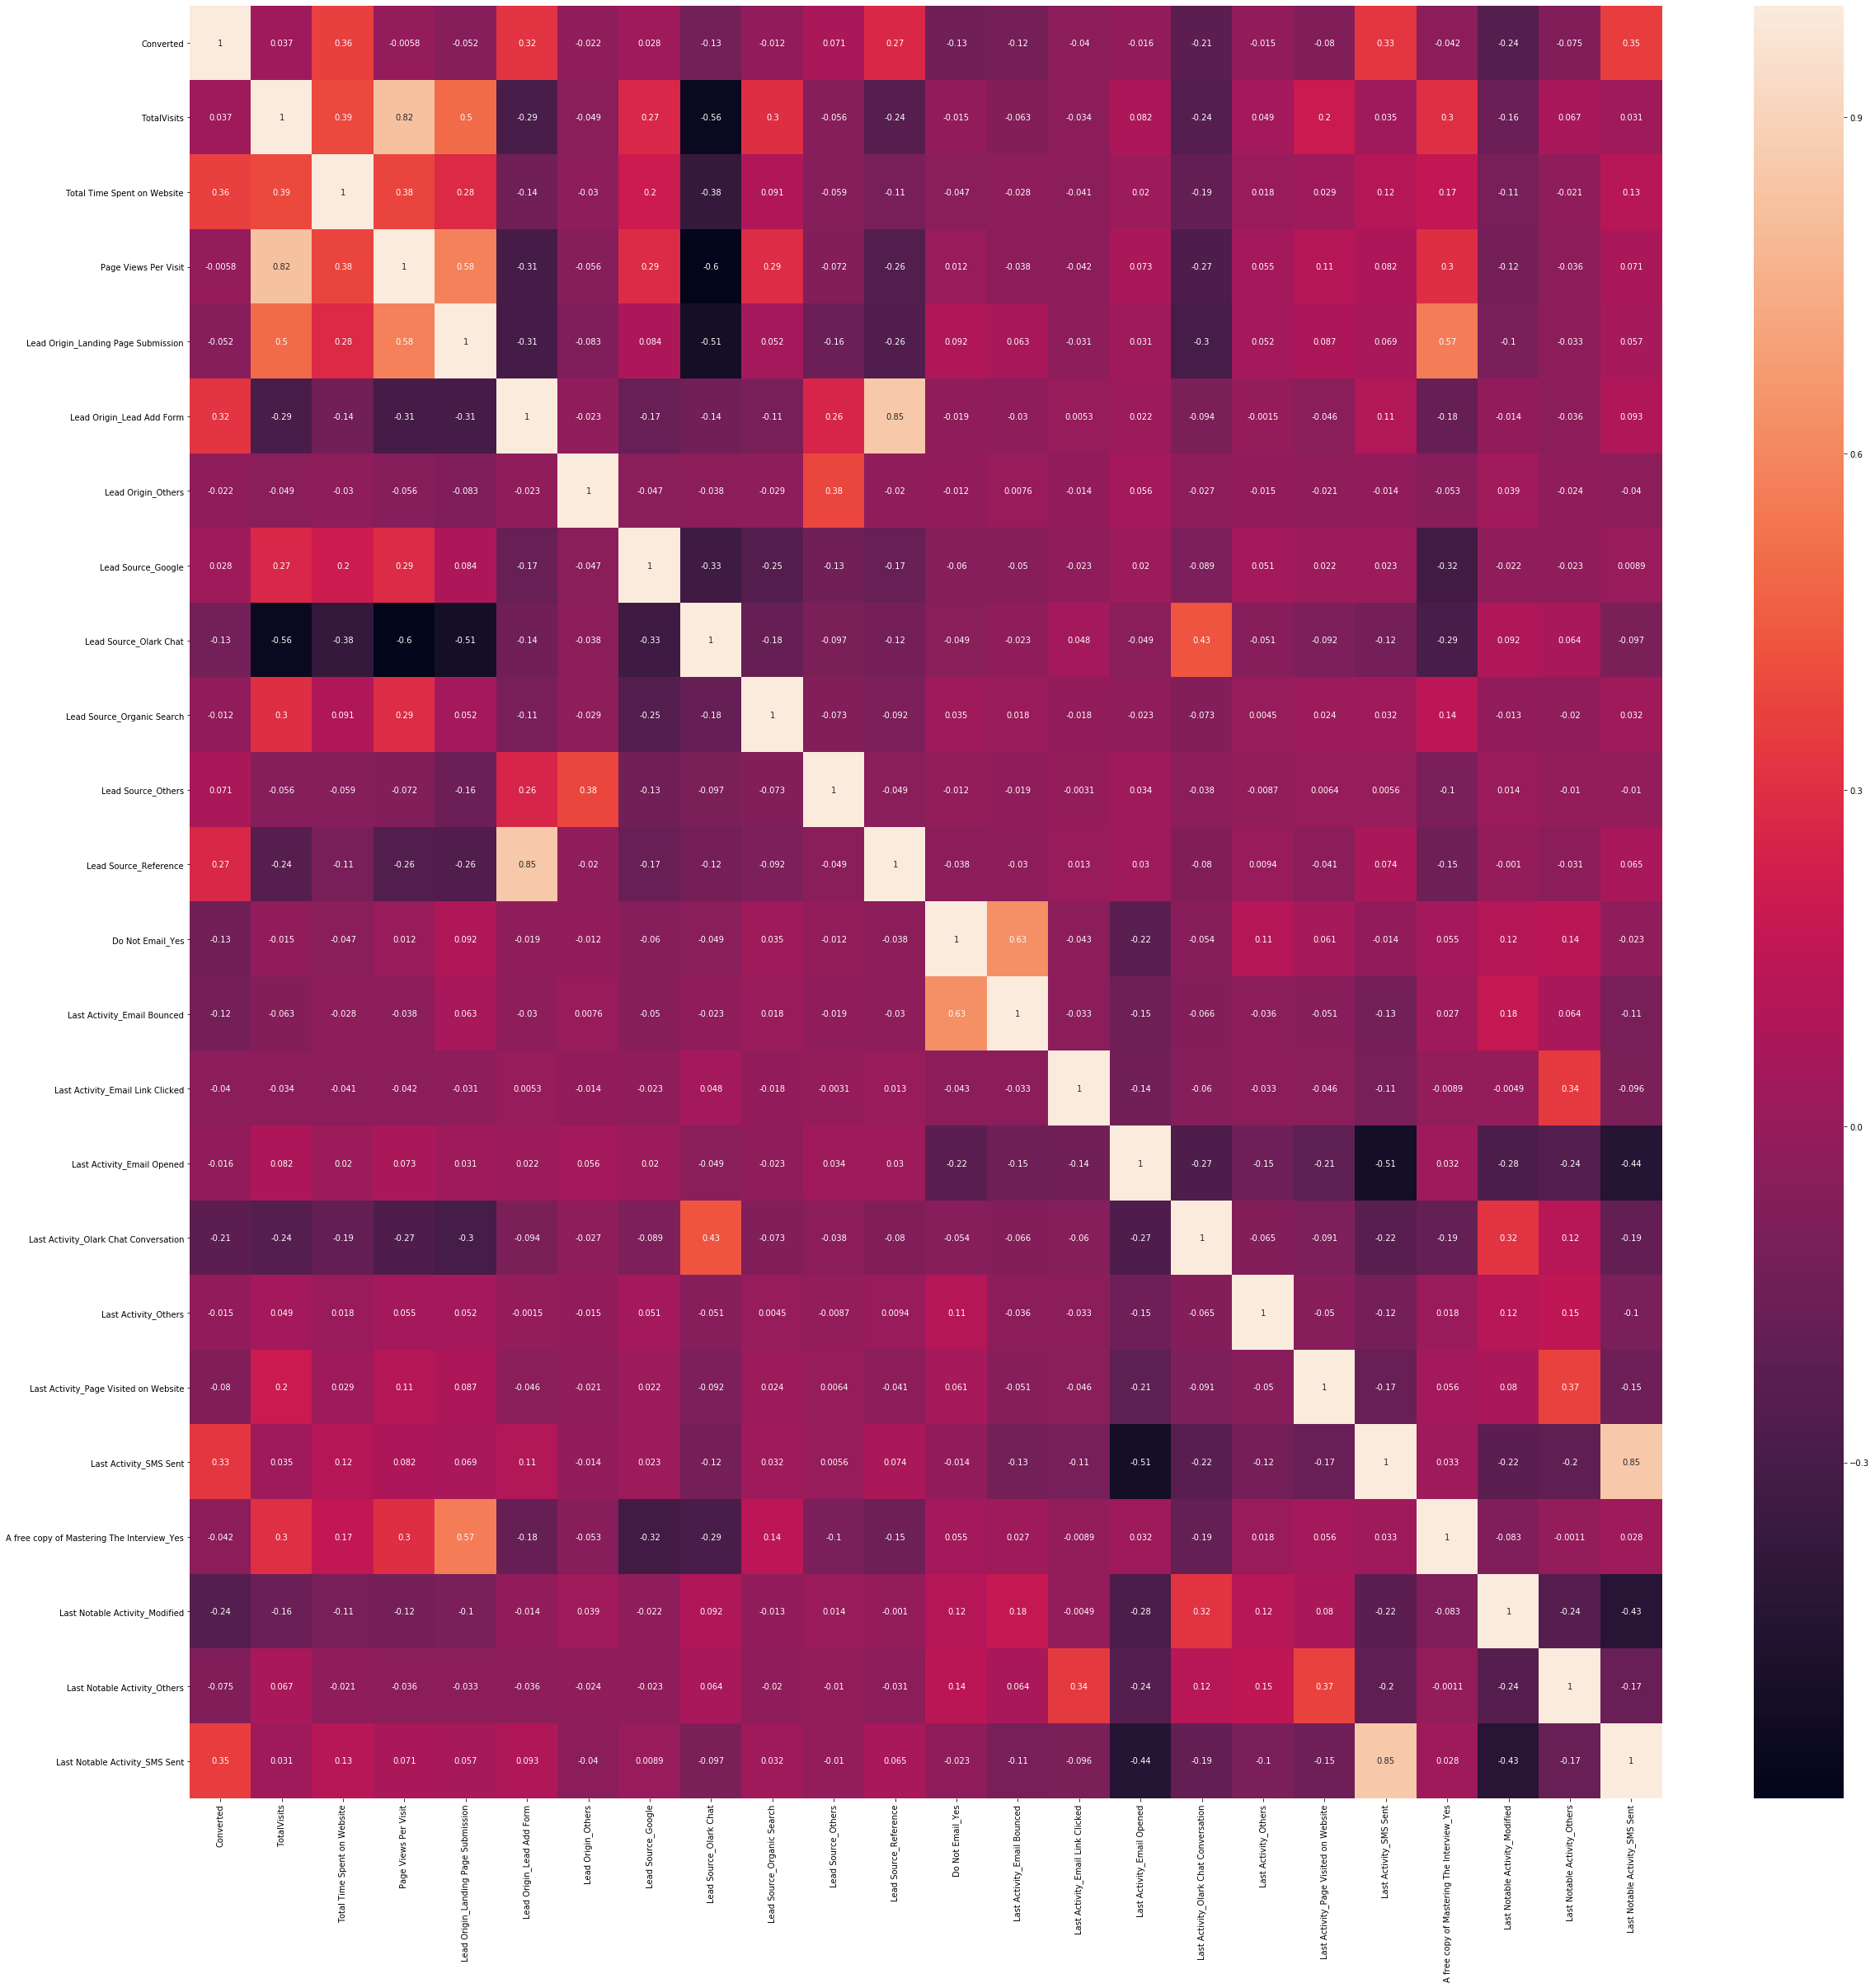

In [54]:
# Plot a Heatmap
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [55]:
# Correlation Matrix
data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Converted,1.000000,0.036575,0.360298,-0.005762,-0.052359,0.324947,-0.021766,0.027605,-0.130116,-0.012424,...,-0.039733,-0.016280,-0.213287,-0.015310,-0.079962,0.328455,-0.042034,-0.244189,-0.074709,0.354306
TotalVisits,0.036575,1.000000,0.388637,0.820281,0.500655,-0.289863,-0.049472,0.268759,-0.558050,0.296620,...,-0.034073,0.081852,-0.244255,0.049303,0.198657,0.034622,0.301396,-0.161164,0.066612,0.030765
Total Time Spent on Website,0.360298,0.388637,1.000000,0.379495,0.277364,-0.139267,-0.030011,0.203962,-0.378702,0.090858,...,-0.040766,0.019669,-0.192697,0.017753,0.029101,0.116751,0.168329,-0.106341,-0.020876,0.125152
Page Views Per Visit,-0.005762,0.820281,0.379495,1.000000,0.577411,-0.310027,-0.056381,0.286984,-0.599539,0.292939,...,-0.042104,0.073384,-0.272888,0.055466,0.112294,0.082219,0.298710,-0.124087,-0.035725,0.071118
Lead Origin_Landing Page Submission,-0.052359,0.500655,0.277364,0.577411,1.000000,-0.307426,-0.082713,0.084453,-0.513515,0.052234,...,-0.030835,0.031441,-0.303172,0.051692,0.086786,0.068787,0.568421,-0.100998,-0.032822,0.057446
Lead Origin_Lead Add Form,0.324947,-0.289863,-0.139267,-0.310027,-0.307426,1.000000,-0.023039,-0.169029,-0.140969,-0.108128,...,0.005289,0.022218,-0.094347,-0.001542,-0.045998,0.105741,-0.180110,-0.013619,-0.035882,0.093233
Lead Origin_Others,-0.021766,-0.049472,-0.030011,-0.056381,-0.082713,-0.023039,1.000000,-0.047460,-0.038484,-0.029092,...,-0.013617,0.056307,-0.027165,-0.014868,-0.020818,-0.014379,-0.052503,0.038718,-0.024408,-0.040416
Lead Source_Google,0.027605,0.268759,0.203962,0.286984,0.084453,-0.169029,-0.047460,1.000000,-0.332199,-0.251124,...,-0.023126,0.019645,-0.088665,0.050752,0.022334,0.023141,-0.318890,-0.021526,-0.023271,0.008873
Lead Source_Olark Chat,-0.130116,-0.558050,-0.378702,-0.599539,-0.513515,-0.140969,-0.038484,-0.332199,1.000000,-0.180614,...,0.048299,-0.049082,0.426420,-0.051017,-0.092013,-0.123197,-0.292733,0.091745,0.064378,-0.097404
Lead Source_Organic Search,-0.012424,0.296620,0.090858,0.292939,0.052234,-0.108128,-0.029092,-0.251124,-0.180614,1.000000,...,-0.017561,-0.023388,-0.072617,0.004451,0.024155,0.032412,0.142120,-0.013152,-0.020034,0.032331


#### Build the model.

In [56]:
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Mon, 02 Mar 2020   Deviance:                       5579.5
Time:                        21:35:14   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.9824      0.263     -7.523      0.000      -2.499      -1.466
TotalVisits                                    0.3357      0.061      5.547      0.000       0.217       0.454
Total Time Spent on Website                    1.1248      0.039     28.504      0.000       1.047       1.202
Page Views Per Visit                          -0.2965      0.065     -4.597      0.000      -0.423      -0.170
Lead Origin_Landing Page Submission           -0.0385      0.104     -0.369      0.712      -0.243       0.166
Lead Origin_Lead Add Form                      4.0624      0.409      9.933      0.000       3.261       4.864
Lead Origin_Others                             0.0557      0.498      0.112      0.911      -0.921       1.032
Lead Source_Google                             0.2669      0.111      2.400      0.016       0.049       0.485
Lead Source_Olark Chat                         1.2534      0.162      7.716      0.000       0.935       1.572
Lead Source_Organic Search                     0.0997      0.128      0.776      0.438      -0.152       0.351
Lead Source_Others                             0.2965      0.267      1.112      0.266      -0.226       0.819
Lead Source_Reference                          0.0895      0.451      0.198      0.843      -0.795       0.974
Do Not Email_Yes                              -1.1550      0.190     -6.085      0.000      -1.527      -0.783
Last Activity_Email Bounced                   -0.1059      0.390     -0.272      0.786      -0.870       0.658
Last Activity_Email Link Clicked               0.1529      0.304      0.503      0.615      -0.443       0.749
Last Activity_Email Opened                     0.8291      0.232      3.567      0.000       0.374       1.285
Last Activity_Olark Chat Conversation         -0.8385      0.259     -3.236      0.001      -1.346      -0.331
Last Activity_Others                           0.9725      0.271      3.585      0.000       0.441       1.504
Last Activity_Page Visited on Website          0.1471      0.262      0.561      0.575      -0.367       0.661
Last Activity_SMS Sent                         1.0608      0.238      4.452      0.000       0.594       1.528
A free copy of Mastering The Interview_Yes    -0.1070      0.103     -1.033      0.301      -0.310       0.096
Last Notable Activity_Modified                -0.2474      0.131     -1.885      0.059      -0.505       0.010
Last Notable Activity_Others                   0.1977      0.211      0.935      0.350      -0.217       0.612
Last Notable Activity_SMS Sent                 1.2370      0.195      6.328      0.000       0.854       1.620
======================================================================================

#### Use Logistic Regression and Recursive Feature elimination.

In [57]:
logreg = LogisticRegression()

In [58]:
# Reduce it down to 15 columns.
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True])

In [60]:
# Columns that are selected and ranked.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 7),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('A free copy of Mastering The Interview_Yes', False, 3),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', False, 4),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]

#### Fit the data on the model and observe the p-values and VIF.

In [62]:
# Determine model parameters
X_train_sm = sm.add_constant(X_train[col])
logml = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.4
Date:                Mon, 02 Mar 2020   Deviance:                       5584.9
Time:                        21:35:15   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8300      0.123    -14.905      0.000      -2.071      -1.589
TotalVisits                               0.3489      0.058      5.996      0.000       0.235       0.463
Total Time Spent on Website               1.1239      0.039     28.549      0.000       1.047       1.201
Page Views Per Visit                     -0.2943      0.062     -4.743      0.000      -0.416      -0.173
Lead Origin_Lead Add Form                 4.0956      0.393     10.424      0.000       3.326       4.866
Lead Source_Google                        0.3112      0.078      3.997      0.000       0.159       0.464
Lead Source_Olark Chat                    1.3552      0.137      9.895      0.000       1.087       1.624
Lead Source_Others                        0.3746      0.224      1.671      0.095      -0.065       0.814
Lead Source_Reference                     0.1758      0.433      0.406      0.685      -0.673       1.025
Do Not Email_Yes                         -1.2020      0.167     -7.197      0.000      -1.529      -0.875
Last Activity_Email Opened                0.6061      0.115      5.251      0.000       0.380       0.832
Last Activity_Olark Chat Conversation    -0.9414      0.184     -5.115      0.000      -1.302      -0.581
Last Activity_Others                      0.8647      0.199      4.349      0.000       0.475       1.254
Last Activity_SMS Sent                    0.9228      0.166      5.569      0.000       0.598       1.248
Last Notable Activity_Modified           -0.3448      0.101     -3.429      0.001      -0.542      -0.148
Last Notable Activity_SMS Sent            1.1404      0.177      6.437      0.000       0.793       1.488
=========================================================================================================
"""

In [63]:
# Determine VIF
vif = pd.DataFrame()
X = X_train_sm.drop('const', axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,6.61
3,Lead Origin_Lead Add Form,6.29
14,Last Notable Activity_SMS Sent,6.25
7,Lead Source_Reference,5.49
2,Page Views Per Visit,3.72
0,TotalVisits,3.24
5,Lead Source_Olark Chat,2.95
13,Last Notable Activity_Modified,2.08
10,Last Activity_Olark Chat Conversation,1.78
9,Last Activity_Email Opened,1.77


#### Define functions to rebuild the model and calculate the VIF after removal of each column.

In [64]:
# Rebuild the model.
def rebuild_model(remove_col, selected_cols, X_train, sm, y_train):
    selected_cols.remove(remove_col)
    X_train_rfe = X_train[selected_cols]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial()).fit()
    return lm, X_train_rfe, selected_cols

# Calculate VIF
def calculate_VIF(pd, X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe.drop('const', axis = 1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

#### The next few steps involve removing columns manually.

In [65]:
col = list(col)
lm, X_train_sm, col = rebuild_model('Lead Source_Reference', col, X_train, sm, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.5
Date:                Mon, 02 Mar 2020   Deviance:                       5585.0
Time:                        21:35:15   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8274      0.123    -14.907      0.000      -2.068      -1.587
TotalVisits                               0.3490      0.058      5.999      0.000       0.235       0.463
Total Time Spent on Website               1.1235      0.039     28.553      0.000       1.046       1.201
Page Views Per Visit                     -0.2947      0.062     -4.751      0.000      -0.416      -0.173
Lead Origin_Lead Add Form                 4.2338      0.202     21.000      0.000       3.839       4.629
Lead Source_Google                        0.3075      0.077      3.977      0.000       0.156       0.459
Lead Source_Olark Chat                    1.3512      0.137      9.892      0.000       1.084       1.619
Lead Source_Others                        0.3381      0.207      1.634      0.102      -0.068       0.744
Do Not Email_Yes                         -1.2068      0.167     -7.233      0.000      -1.534      -0.880
Last Activity_Email Opened                0.6068      0.115      5.258      0.000       0.381       0.833
Last Activity_Olark Chat Conversation    -0.9405      0.184     -5.111      0.000      -1.301      -0.580
Last Activity_Others                      0.8659      0.199      4.356      0.000       0.476       1.256
Last Activity_SMS Sent                    0.9220      0.166      5.564      0.000       0.597       1.247
Last Notable Activity_Modified           -0.3437      0.101     -3.419      0.001      -0.541      -0.147
Last Notable Activity_SMS Sent            1.1410      0.177      6.440      0.000       0.794       1.488
=========================================================================================================
"""

In [66]:
calculate_VIF(pd, X_train_sm)

,Features,VIF
11,Last Activity_SMS Sent,6.61
13,Last Notable Activity_SMS Sent,6.25
2,Page Views Per Visit,3.72
0,TotalVisits,3.24
5,Lead Source_Olark Chat,2.93
12,Last Notable Activity_Modified,2.06
9,Last Activity_Olark Chat Conversation,1.78
8,Last Activity_Email Opened,1.74
3,Lead Origin_Lead Add Form,1.66
4,Lead Source_Google,1.66


In [67]:
lm, X_train_sm, col = rebuild_model('Last Notable Activity_SMS Sent', col, X_train, sm, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.7
Date:                Mon, 02 Mar 2020   Deviance:                       5627.4
Time:                        21:35:15   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5939      0.116    -13.700      0.000      -1.822      -1.366
TotalVisits                               0.3057      0.057      5.327      0.000       0.193       0.418
Total Time Spent on Website               1.1237      0.039     28.632      0.000       1.047       1.201
Page Views Per Visit                     -0.2647      0.061     -4.311      0.000      -0.385      -0.144
Lead Origin_Lead Add Form                 4.2304      0.201     21.061      0.000       3.837       4.624
Lead Source_Google                        0.2975      0.077      3.872      0.000       0.147       0.448
Lead Source_Olark Chat                    1.3330      0.136      9.811      0.000       1.067       1.599
Lead Source_Others                        0.3192      0.208      1.536      0.125      -0.088       0.726
Do Not Email_Yes                         -1.2371      0.166     -7.441      0.000      -1.563      -0.911
Last Activity_Email Opened                0.4483      0.113      3.975      0.000       0.227       0.669
Last Activity_Olark Chat Conversation    -0.8940      0.185     -4.827      0.000      -1.257      -0.531
Last Activity_Others                      0.9133      0.200      4.569      0.000       0.522       1.305
Last Activity_SMS Sent                    1.6826      0.115     14.616      0.000       1.457       1.908
Last Notable Activity_Modified           -0.7255      0.083     -8.774      0.000      -0.888      -0.563
=========================================================================================================
"""

In [68]:
calculate_VIF(pd, X_train_sm)

,Features,VIF
2,Page Views Per Visit,3.71
0,TotalVisits,3.23
5,Lead Source_Olark Chat,2.91
8,Last Activity_Email Opened,1.74
9,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.65
4,Lead Source_Google,1.64
12,Last Notable Activity_Modified,1.63
11,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.28


In [69]:
lm, X_train_sm, col = rebuild_model('Lead Source_Others', col, X_train, sm, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.8
Date:                Mon, 02 Mar 2020   Deviance:                       5629.7
Time:                        21:35:15   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5761      0.116    -13.630      0.000      -1.803      -1.349
TotalVisits                               0.3077      0.057      5.363      0.000       0.195       0.420
Total Time Spent on Website               1.1208      0.039     28.615      0.000       1.044       1.198
Page Views Per Visit                     -0.2680      0.061     -4.368      0.000      -0.388      -0.148
Lead Origin_Lead Add Form                 4.2674      0.200     21.341      0.000       3.875       4.659
Lead Source_Google                        0.2812      0.076      3.698      0.000       0.132       0.430
Lead Source_Olark Chat                    1.3104      0.135      9.700      0.000       1.046       1.575
Do Not Email_Yes                         -1.2362      0.166     -7.449      0.000      -1.561      -0.911
Last Activity_Email Opened                0.4490      0.113      3.982      0.000       0.228       0.670
Last Activity_Olark Chat Conversation    -0.8906      0.185     -4.809      0.000      -1.254      -0.528
Last Activity_Others                      0.9118      0.200      4.559      0.000       0.520       1.304
Last Activity_SMS Sent                    1.6783      0.115     14.591      0.000       1.453       1.904
Last Notable Activity_Modified           -0.7216      0.083     -8.730      0.000      -0.884      -0.560
=========================================================================================================
"""

In [70]:
calculate_VIF(pd, X_train_sm)

,Features,VIF
2,Page Views Per Visit,3.70
0,TotalVisits,3.23
5,Lead Source_Olark Chat,2.88
8,Last Activity_Olark Chat Conversation,1.73
7,Last Activity_Email Opened,1.70
4,Lead Source_Google,1.62
11,Last Notable Activity_Modified,1.62
3,Lead Origin_Lead Add Form,1.60
10,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.28


#### Predict the dependent variable.

In [71]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred[:10]

2401    0.209028
6293    0.172599
1393    0.912064
301     0.124410
7211    0.979774
8739    0.235116
1536    0.932066
8343    0.536289
6156    0.891987
1664    0.091708
dtype: float64

In [72]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion Probability':y_train_pred})
y_train_pred_final

,Converted,Conversion Probability
2401,0,0.209028
6293,0,0.172599
1393,1,0.912064
301,1,0.124410
7211,1,0.979774
8739,0,0.235116
1536,1,0.932066
8343,0,0.536289
6156,1,0.891987
1664,0,0.091708


#### Get an aggregated dataframe with the actual and the predicted values. We are taking the cut off as 0.35.

In [73]:
# Find the predicted values using the probabilities
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head() 

,Converted,Conversion Probability,Predicted
2401,0,0.209028,0
6293,0,0.172599,0
1393,1,0.912064,1
301,1,0.124410,0
7211,1,0.979774,1


#### Calculate the confusion matrix

In [74]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3100,  802],
       [ 492, 1969]], dtype=int64)

In [75]:
# Predicted     not_conv    conv

# Actual

# not_conv        3100      802

# conv            492       1969  

#### Determine model accuracy

In [76]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.7966368065377967

#### Calculate the model evaluation parameters.

In [77]:
TP = confusion[1,1] # true positive 

TN = confusion[0,0] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives 

In [78]:
sensitivity = TP / float(TP+FN)
sensitivity

0.8000812677773262

In [79]:
specificity = TN / float(TN+FP) 
specificity

0.7944643772424398

In [80]:
# Calculate false postive rate
FP / float(TN+FP)

0.20553562275756024

In [81]:
# positive predictive value 
TP / float(TP+FP)

0.7105738000721761

In [82]:
# Negative predictive value
TN / float(TN+ FN)

0.8630289532293987

#### Draw the ROC curve.

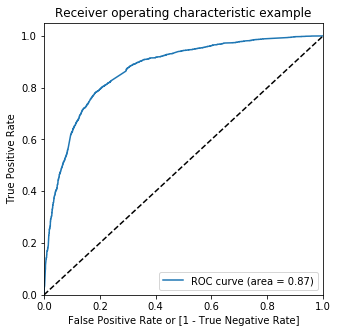

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability'], drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability'])


In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2401,0,0.209028,0,1,1,1,0,0,0,0,0,0,0
6293,0,0.172599,0,1,1,0,0,0,0,0,0,0,0
1393,1,0.912064,1,1,1,1,1,1,1,1,1,1,1
301,1,0.124410,0,1,1,0,0,0,0,0,0,0,0
7211,1,0.979774,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive

# TN = confusion[0,0] # true negatives

# FP = confusion[0,1] # false positives

# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386767,1.000000,0.000000
0.1,0.1,0.577872,0.973182,0.328549
0.2,0.2,0.718058,0.919545,0.590979
0.3,0.3,0.767720,0.863064,0.707586
0.4,0.4,0.802923,0.762698,0.828293
0.5,0.5,0.800251,0.679805,0.876217
0.6,0.6,0.776992,0.556278,0.916197
0.7,0.7,0.760962,0.475823,0.940800
0.8,0.8,0.735345,0.371800,0.964634
0.9,0.9,0.675468,0.182446,0.986417


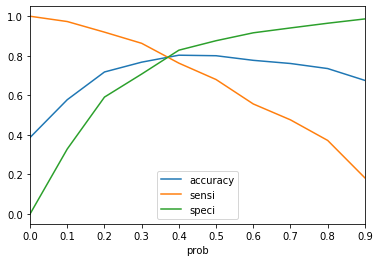

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show() 

#### Calculate the precision and recall values.

In [87]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.7105738000721761

In [88]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']) 

0.8000812677773262

#### Plot the precision recall curve

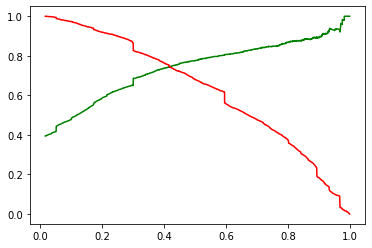

In [89]:
y_train_pred_final['Converted'], y_train_pred_final['Predicted'] 
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability']) 
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show() 

#### Evaluate the model on the test data.

In [90]:
# Scale the data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3343,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2600,0.050829,-0.629361,0.528297,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
3115,1.803812,-0.153881,1.750771,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1348,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4525,0.489075,2.203560,1.139534,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
461,-0.387417,-0.565843,-0.082940,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1079,0.489075,0.267156,1.139534,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7339,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6291,0.050829,-0.681991,0.528297,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1672,-0.387417,-0.144806,-0.694177,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [91]:
# Select the columns that we used for train data.
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified
3343,-1.263908,-0.883435,-1.305414,0,0,1,0,1,0,0,0,0
2600,0.050829,-0.629361,0.528297,0,0,0,0,0,0,0,1,1
3115,1.803812,-0.153881,1.750771,0,1,0,0,0,0,0,0,0
1348,-1.263908,-0.883435,-1.305414,0,0,1,0,0,1,0,0,1
4525,0.489075,2.203560,1.139534,0,1,0,0,0,0,0,1,0


In [92]:
# Add a constant for statsmodel library
X_test_sm = sm.add_constant(X_test)

In [93]:
# Make Predictions
y_test_pred = lm.predict(X_test_sm) 
y_test_pred[:10]

3343    0.300323
2600    0.189887
3115    0.200739
1348    0.051810
4525    0.936923
461     0.116492
1079    0.628979
7339    0.051810
6291    0.149793
1672    0.107947
dtype: float64

In [94]:
# Convert to DataFrame
y_pred_1 = pd.DataFrame(y_test_pred) 
y_pred_1.head() 

,0
3343,0.300323
2600,0.189887
3115,0.200739
1348,0.051810
4525,0.936923


In [95]:
y_test_df = pd.DataFrame(y_test) 
y_test_df.head()

,Converted
3343,1
2600,1
3115,0
1348,0
4525,1


In [96]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1) 
y_pred_final.columns = ['Converted', 'Converted Probability']
y_pred_final

,Converted,Converted Probability
3343,1,0.300323
2600,1,0.189887
3115,0,0.200739
1348,0,0.051810
4525,1,0.936923
461,0,0.116492
1079,1,0.628979
7339,0,0.051810
6291,0,0.149793
1672,0,0.107947


#### Get aggregated results for test data.

In [97]:
y_pred_final['Predicted'] = y_pred_final['Converted Probability'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Converted Probability,Predicted
3343,1,0.300323,0
2600,1,0.189887,0
3115,0,0.200739,0
1348,0,0.051810,0
4525,1,0.936923,1
461,0,0.116492,0
1079,1,0.628979,1
7339,0,0.051810,0
6291,0,0.149793,0
1672,0,0.107947,0


#### Check metrics on test data.

In [98]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Predicted'])

0.8030803080308031

In [99]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Predicted'])
confusion_test

array([[1354,  339],
       [ 198,  836]], dtype=int64)

In [100]:
TP = confusion_test[1,1] # true positive 

TN = confusion_test[0,0] # true negatives

FP = confusion_test[0,1] # false positives

FN = confusion_test[1,0] # false negatives 

In [101]:
sensitivity = TP / float(TP+FN)
sensitivity

0.8085106382978723

In [102]:
specificity = TN / float(TN+FP) 
specificity

0.7997637330183107

#### Fit the model on the complete data set and calculate lead scores.

In [103]:
X = data.drop('Converted', axis=1)
y = data['Converted']

In [104]:
X[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.927320,0.339748,0.222678,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.387417,1.896857,-0.082940,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,-0.825662,-0.329917,-0.694177,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,-0.387417,1.708117,-0.694177,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,-0.387417,2.092857,-0.082940,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,-1.263908,-0.883435,-1.305414,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,-0.387417,-0.754583,-0.082940,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,0.489075,-0.778176,1.139534,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [105]:
X_data = X[col]
X_data.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified
0,-1.263908,-0.883435,-1.305414,0,0,1,0,0,0,0,0,1
1,0.927320,0.339748,0.222678,0,0,0,0,1,0,0,0,0
2,-0.387417,1.896857,-0.082940,0,0,0,0,1,0,0,0,0
3,-0.825662,-0.329917,-0.694177,0,0,0,0,0,0,1,0,1
4,-0.387417,1.708117,-0.694177,0,1,0,0,0,0,0,0,1


In [106]:
X_data_sm = sm.add_constant(X_data)

In [107]:
y_data_pred = lm.predict(X_data_sm) 
y_data_pred[:10]

0    0.117497
1    0.372709
2    0.711380
3    0.139012
4    0.491239
5    0.051810
6    0.664048
7    0.051810
8    0.112071
9    0.133190
dtype: float64

In [108]:
y_pred_data = pd.DataFrame(y_data_pred) 
y_pred_data.head() 

,0
0,0.117497
1,0.372709
2,0.711380
3,0.139012
4,0.491239


In [109]:
y_data_df = pd.DataFrame(y) 
y_data_df.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [110]:
y_pred_final_data = pd.concat([y_data_df, y_pred_data],axis=1) 
y_pred_final_data.columns = ['Converted', 'Converted Probability']
y_pred_final_data

,Converted,Converted Probability
0,0,0.117497
1,0,0.372709
2,1,0.711380
3,0,0.139012
4,1,0.491239
5,0,0.051810
6,1,0.664048
7,0,0.051810
8,0,0.112071
9,0,0.133190


#### Calculate the aggregated data for the complete dataset

In [111]:
y_pred_final_data['Predicted'] = y_pred_final_data['Converted Probability'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final_data

,Converted,Converted Probability,Predicted
0,0,0.117497,0
1,0,0.372709,1
2,1,0.711380,1
3,0,0.139012,0
4,1,0.491239,1
5,0,0.051810,0
6,1,0.664048,1
7,0,0.051810,0
8,0,0.112071,0
9,0,0.133190,0


#### Calculate the metrics for the entire data.

In [112]:
metrics.accuracy_score(y_pred_final_data['Converted'], y_pred_final_data['Predicted'])

0.7985698569856986

In [113]:
confusion_data = metrics.confusion_matrix(y_pred_final_data['Converted'], y_pred_final_data['Predicted'])
confusion_data

array([[4454, 1141],
       [ 690, 2805]], dtype=int64)

In [114]:
TP = confusion_data[1,1] # true positive 

TN = confusion_data[0,0] # true negatives

FP = confusion_data[0,1] # false positives

FN = confusion_data[1,0] # false negatives 

In [115]:
sensitivity = TP / float(TP+FN)
sensitivity

0.8025751072961373

In [116]:
specificity = TN / float(TN+FP) 
specificity

0.7960679177837354

In [117]:
ID

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624
9,af465dfc-7204-4130-9e05-33231863c4b5,660616


In [118]:
len(y_pred_final_data)

9090

In [119]:
y_pred_final_data['ID'] = ID['Lead Number']
y_pred_final_data

,Converted,Converted Probability,Predicted,ID
0,0,0.117497,0,660737
1,0,0.372709,1,660728
2,1,0.711380,1,660727
3,0,0.139012,0,660719
4,1,0.491239,1,660681
5,0,0.051810,0,660680
6,1,0.664048,1,660673
7,0,0.051810,0,660664
8,0,0.112071,0,660624
9,0,0.133190,0,660616


In [120]:
final = y_pred_final_data[['ID', 'Converted Probability']]
final.columns = ['Lead Number', 'Lead Score']
final

,Lead Number,Lead Score
0,660737,0.117497
1,660728,0.372709
2,660727,0.711380
3,660719,0.139012
4,660681,0.491239
5,660680,0.051810
6,660673,0.664048
7,660664,0.051810
8,660624,0.112071
9,660616,0.133190


In [121]:
final['Lead Score'] = final['Lead Score'] * 100

In [122]:
final

,Lead Number,Lead Score
0,660737,11.749656
1,660728,37.270913
2,660727,71.137996
3,660719,13.901201
4,660681,49.123934
5,660680,5.181007
6,660673,66.404843
7,660664,5.181007
8,660624,11.207097
9,660616,13.319024


In [123]:
data = data[col]
data['Lead Number'] = final['Lead Number']
data['Lead Score'] = final['Lead Score']

In [124]:
data.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Notable Activity_Modified,Lead Number,Lead Score
0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,660737,11.749656
1,5.0,674.0,2.5,0,0,0,0,1,0,0,0,0,660728,37.270913
2,2.0,1532.0,2.0,0,0,0,0,1,0,0,0,0,660727,71.137996
3,1.0,305.0,1.0,0,0,0,0,0,0,1,0,1,660719,13.901201
4,2.0,1428.0,1.0,0,1,0,0,0,0,0,0,1,660681,49.123934


#### Make Visualization Plots for the Lead Scores

In [125]:
data.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Lead Number', 'Lead Score'],
      dtype='object')

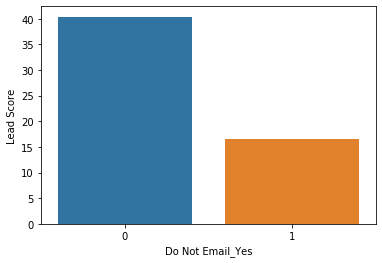

In [126]:
#data['Do Not Email_Yes'].value_counts()
df = data.groupby('Do Not Email_Yes')['Lead Score'].mean().reset_index()
sns.barplot(x='Do Not Email_Yes', y='Lead Score', data=df)

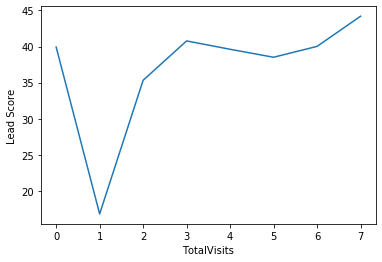

In [127]:
df = data.groupby('TotalVisits')['Lead Score'].mean().reset_index()
sns.lineplot(x='TotalVisits', y='Lead Score', data=df)

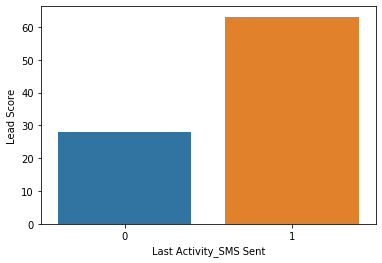

In [128]:
df = data.groupby('Last Activity_SMS Sent')['Lead Score'].mean().reset_index()
sns.barplot(x='Last Activity_SMS Sent', y='Lead Score', data=df)

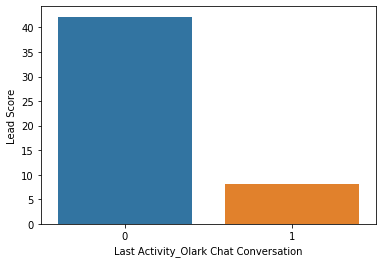

In [129]:
df = data.groupby('Last Activity_Olark Chat Conversation')['Lead Score'].mean().reset_index()
sns.barplot(x='Last Activity_Olark Chat Conversation', y='Lead Score', data=df)

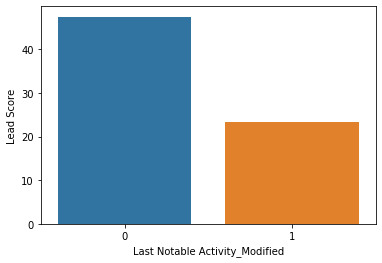

In [130]:
df = data.groupby('Last Notable Activity_Modified')['Lead Score'].mean().reset_index()
sns.barplot(x='Last Notable Activity_Modified', y='Lead Score', data=df)

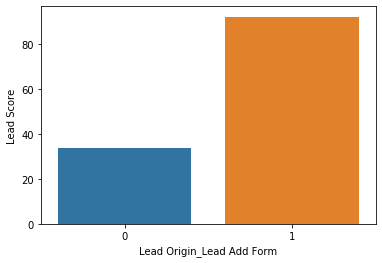

In [131]:
df = data.groupby('Lead Origin_Lead Add Form')['Lead Score'].mean().reset_index()
sns.barplot(x='Lead Origin_Lead Add Form', y='Lead Score', data=df)

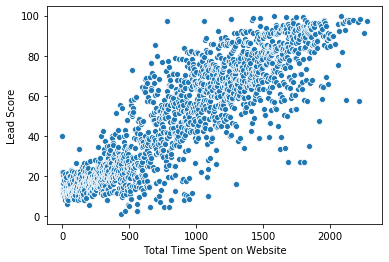

In [132]:
df = data.groupby('Total Time Spent on Website')['Lead Score'].mean().reset_index()
sns.scatterplot(x='Total Time Spent on Website', y='Lead Score', data=df)

In [133]:
#################################################################################################################